# Spaceship Titanic Clasification

# imports

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os
import pandas as pd
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

# Getting the datasets

In [2]:
df = pd.read_csv("data/train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
test_df = pd.read_csv("data/test.csv")
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
sample_df = pd.read_csv("data/sample_submission.csv")
sample_df

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


# Visualising the dataset

In [5]:
print("Size of the training data set: ", len(df))

Size of the training data set:  8693


In [6]:
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [7]:
transported = df[df['Transported'] == True]
not_transported = df[df['Transported'] == False]

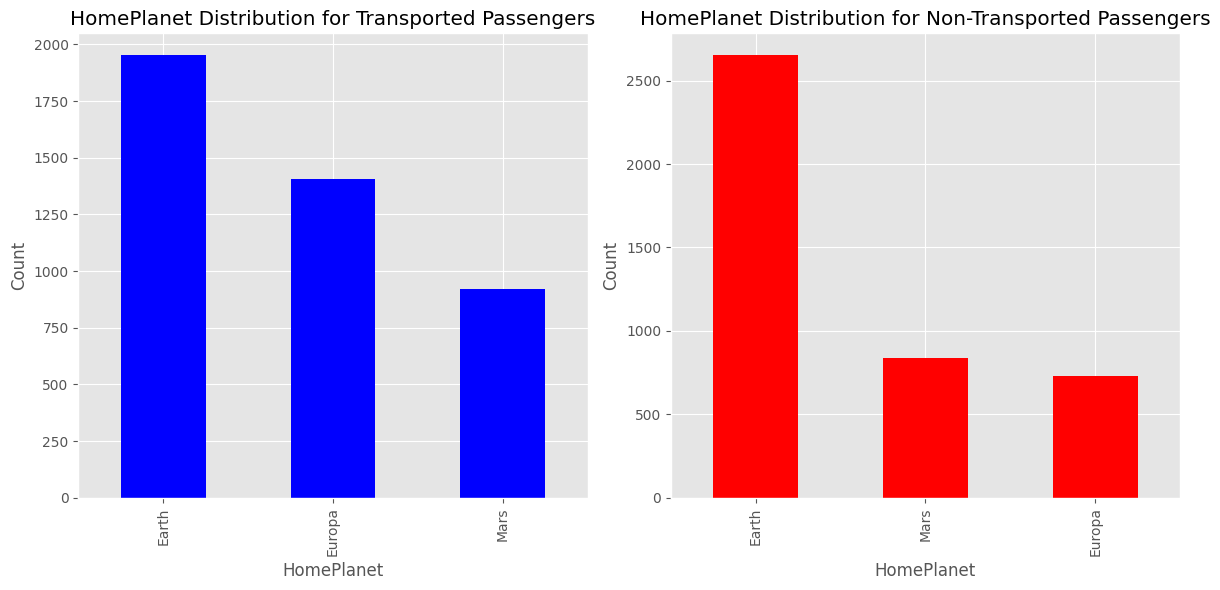

In [8]:
# Count the occurrences of each HomePlanet for transported passengers
transported_counts = transported['HomePlanet'].value_counts()

# Count the occurrences of each HomePlanet for non-transported passengers
not_transported_counts = not_transported['HomePlanet'].value_counts()

# Plot bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
transported_counts.plot(kind='bar', color='blue')
plt.title('HomePlanet Distribution for Transported Passengers')
plt.xlabel('HomePlanet')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
not_transported_counts.plot(kind='bar', color='red')
plt.title('HomePlanet Distribution for Non-Transported Passengers')
plt.xlabel('HomePlanet')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

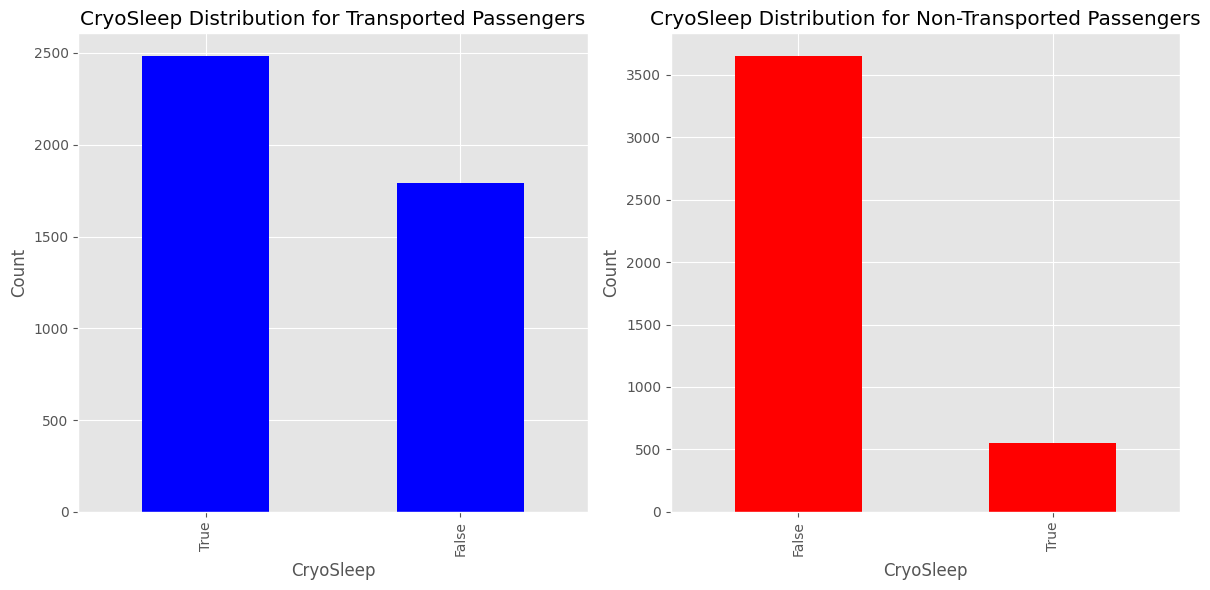

In [9]:
# Count the occurrences of CryoSleep for transported passengers
transported_cryo_counts = transported['CryoSleep'].value_counts()

# Count the occurrences of CryoSleep for non-transported passengers
not_transported_cryo_counts = not_transported['CryoSleep'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
transported_cryo_counts.plot(kind='bar', color='blue')
plt.title('CryoSleep Distribution for Transported Passengers')
plt.xlabel('CryoSleep')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
not_transported_cryo_counts.plot(kind='bar', color='red')
plt.title('CryoSleep Distribution for Non-Transported Passengers')
plt.xlabel('CryoSleep')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

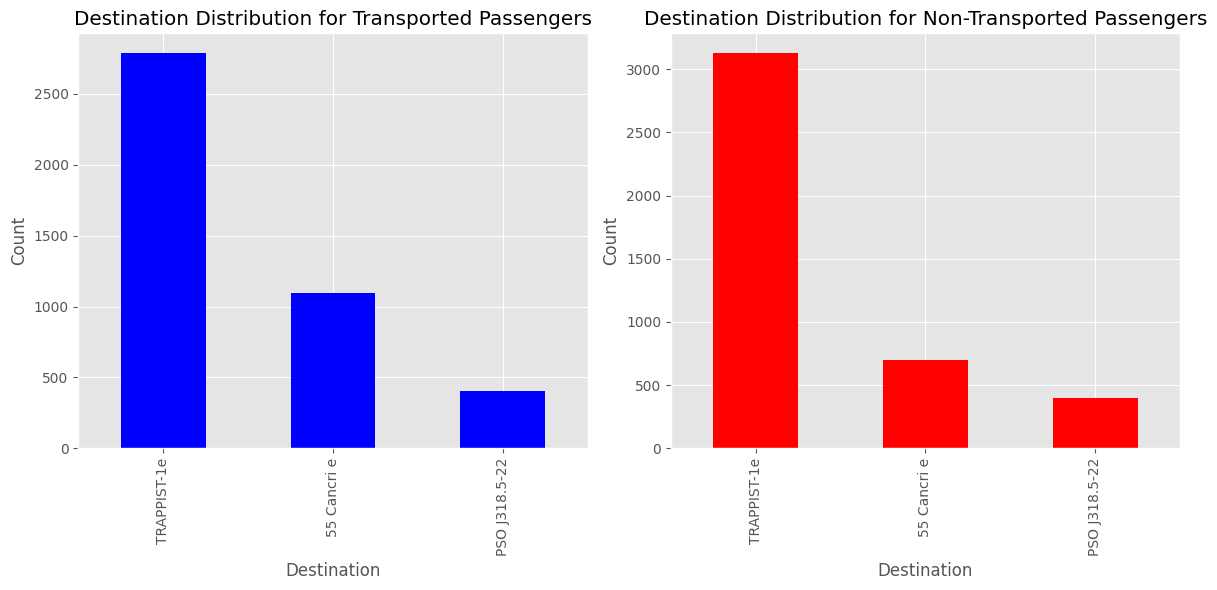

In [10]:
# Count the occurrences of Destination for transported passengers
transported_dest_counts = transported['Destination'].value_counts()

# Count the occurrences of Destination for non-transported passengers
not_transported_dest_counts = not_transported['Destination'].value_counts()

# Plot bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
transported_dest_counts.plot(kind='bar', color='blue')
plt.title('Destination Distribution for Transported Passengers')
plt.xlabel('Destination')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
not_transported_dest_counts.plot(kind='bar', color='red')
plt.title('Destination Distribution for Non-Transported Passengers')
plt.xlabel('Destination')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

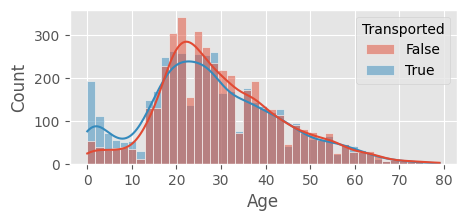

In [11]:
plt.figure(figsize=(5,2))
sns.histplot(x='Age', data=df, hue='Transported',kde=True)
plt.show()

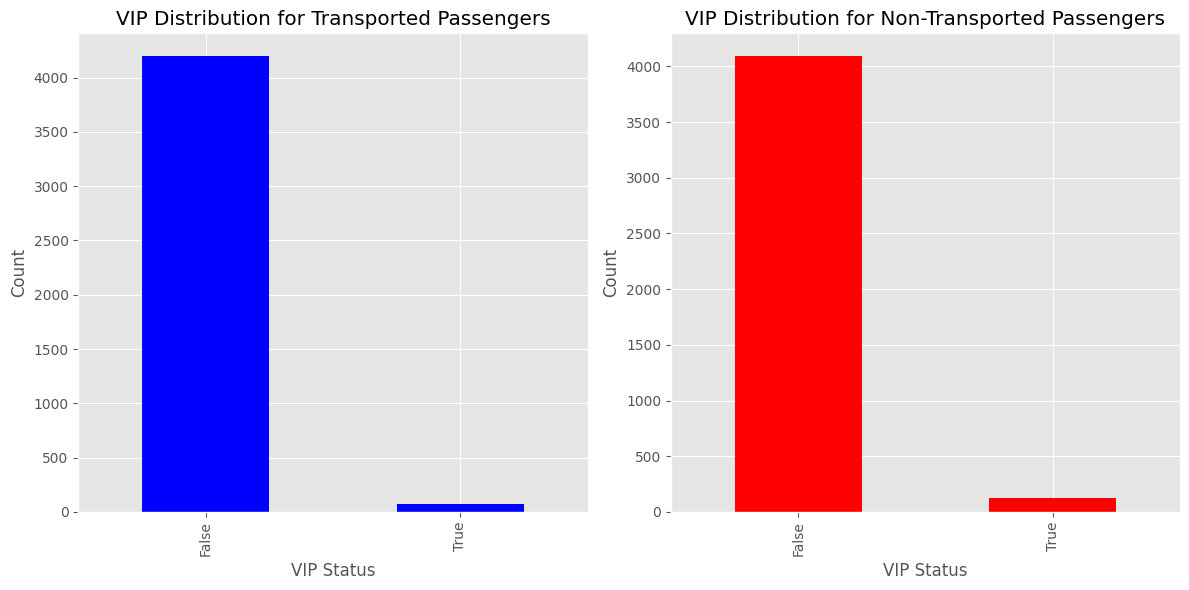

In [12]:
# Count the occurrences of VIP status for transported passengers
transported_vip_counts = transported['VIP'].value_counts()

# Count the occurrences of VIP status for non-transported passengers
not_transported_vip_counts = not_transported['VIP'].value_counts()

# Plot bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
transported_vip_counts.plot(kind='bar', color='blue')
plt.title('VIP Distribution for Transported Passengers')
plt.xlabel('VIP Status')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
not_transported_vip_counts.plot(kind='bar', color='red')
plt.title('VIP Distribution for Non-Transported Passengers')
plt.xlabel('VIP Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Data Cleaning

In [13]:
df['Transported'].isna().sum()

0

In [14]:
data=pd.concat([df,test_df],axis=0,ignore_index=True)
data = pd.concat([data, data['Cabin'].str.split('/', expand=True)], axis=1)
data.rename(columns={0: 'Deck', 1: 'Num', 2: 'Side'}, inplace=True)
data.drop(columns=['PassengerId','Name','Cabin','Num'],inplace=True)
data.isna().sum()/data.shape[0]

HomePlanet      0.022205
CryoSleep       0.023901
Destination     0.021126
Age             0.020817
VIP             0.022822
RoomService     0.020278
FoodCourt       0.022282
ShoppingMall    0.023593
Spa             0.021897
VRDeck          0.020663
Transported     0.329761
Deck            0.023053
Side            0.023053
dtype: float64

In [15]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN,G,S
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN
12967,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,NaN,D,P
12968,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,D,P


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  object 
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Transported   8693 non-null   object 
 11  Deck          12671 non-null  object 
 12  Side          12671 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


In [17]:
for col in data.columns:
    if data[col].dtype==object:
        print(col,'\b:')
        print(data[col].value_counts(dropna=False))

HomePlanet:
HomePlanet
Earth     6865
Europa    3133
Mars      2684
NaN        288
Name: count, dtype: int64
CryoSleep:
CryoSleep
False    8079
True     4581
NaN       310
Name: count, dtype: int64
Destination:
Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
NaN               274
Name: count, dtype: int64
VIP:
VIP
False    12401
NaN        296
True       273
Name: count, dtype: int64
Transported:
Transported
True     4378
False    4315
NaN      4277
Name: count, dtype: int64
Deck:
Deck
F      4239
G      3781
E      1323
B      1141
C      1102
D       720
A       354
NaN     299
T        11
Name: count, dtype: int64
Side:
Side
S      6381
P      6290
NaN     299
Name: count, dtype: int64


In [18]:
data['HomePlanet'].fillna('Earth',inplace=True)
data['CryoSleep'].fillna(False,inplace=True)
data['Destination'].fillna('TRAPPIST-1e',inplace=True)
data['VIP'].fillna(False,inplace=True)
data['Deck'].fillna('F',inplace=True)
data['Side'].fillna(method='ffill',inplace=True)
data['Transported'].fillna(method='ffill',inplace=True)

for col in data.columns:
    if data[col].dtype!=object:
        data[col].fillna(data[col].median(),inplace=True)
        
data.isna().sum()[data.isna().sum()>0]

C:\Users\marco\AppData\Local\Temp\ipykernel_6124\3999384683.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Side'].fillna(method='ffill',inplace=True)
C:\Users\marco\AppData\Local\Temp\ipykernel_6124\3999384683.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Transported'].fillna(method='ffill',inplace=True)


Series([], dtype: int64)

# Create New Feature

In [19]:
data.Age.describe()

count    12970.000000
mean        28.735081
std         14.238958
min          0.000000
25%         20.000000
50%         27.000000
75%         37.000000
max         79.000000
Name: Age, dtype: float64

In [20]:
data.insert(loc=4,column='Age_category',value=0)
data.Age_category[data.Age<=20]='1'
data.Age_category[(data.Age>20)&(data.Age<=27)]='2'
data.Age_category[(data.Age>27)&(data.Age<=37)]='3'
data.Age_category[data.Age>37]='4'
data.head()

C:\Users\marco\AppData\Local\Temp\ipykernel_6124\400247068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age_category[data.Age<=20]='1'
C:\Users\marco\AppData\Local\Temp\ipykernel_6124\400247068.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.Age_category[data.Age<=20]='1'


,HomePlanet,CryoSleep,Destination,Age,Age_category,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,4,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,2,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,4,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,3,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,1,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [21]:
data.Age_category.astype(object)
data.Age_category.dtype

dtype('O')

# Standadizing

In [22]:
for col in data.columns:
    if data[col].dtype=='float64':
        print(col,'\b:',data[col].var())

Age: 202.74791719986092
RoomService: 411863.8565454137
FoodCourt: 2458743.4090403705
ShoppingMall: 341235.4634393278
Spa: 1251594.3696245237
VRDeck: 1365756.0028085478


In [23]:
data1=data.copy()
for col in data1.columns:
    if data1[col].dtype=='float64':
        data1[col]=(data1[col]-data1[col].mean())/data1[col].std()
        print(data1[col].var())

0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0
1.0000000000000002
0.9999999999999999


# OneHot Encoding

In [24]:
data1['Transported'].astype(int)
data1=pd.get_dummies(data1)
data1.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,False,0.720904,False,-0.340277,-0.281811,-0.292354,-0.269697,-0.257091,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,-0.332544,False,-0.170433,-0.276072,-0.249557,0.221031,-0.219440,True,True,...,False,False,False,False,False,True,False,False,False,True
2,False,2.055271,True,-0.273274,1.998745,-0.292354,5.732555,-0.215162,False,False,...,True,False,False,False,False,False,False,False,False,True
3,False,0.299525,False,-0.340277,0.536409,0.342753,2.705954,-0.091943,False,False,...,True,False,False,False,False,False,False,False,False,True
4,False,-0.894383,False,0.131858,-0.237170,-0.033860,0.235333,-0.255379,True,True,...,False,False,False,False,False,True,False,False,False,True


# Data Split

In [25]:
train1=data1.iloc[:df.shape[0],:]
test1=data1.iloc[df.shape[0]:,:]
train1.shape,test_df.shape

((8693, 29), (4277, 13))

# Duplicated Values

In [26]:
train1.duplicated().sum()

1938

In [27]:
train1 = train1.copy()  # Create a copy of the DataFrame

train1.drop_duplicates(inplace=True)
train1.duplicated().sum()

0

# Outliers

In [28]:
clf = LocalOutlierFactor(contamination = 0.02)
outliers = clf.fit_predict(train1)
train2 = train1[np.where(outliers == 1, True, False)]
train2.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,False,0.720904,False,-0.340277,-0.281811,-0.292354,-0.269697,-0.257091,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,-0.332544,False,-0.170433,-0.276072,-0.249557,0.221031,-0.219440,True,True,...,False,False,False,False,False,True,False,False,False,True
2,False,2.055271,True,-0.273274,1.998745,-0.292354,5.732555,-0.215162,False,False,...,True,False,False,False,False,False,False,False,False,True
3,False,0.299525,False,-0.340277,0.536409,0.342753,2.705954,-0.091943,False,False,...,True,False,False,False,False,False,False,False,False,True
4,False,-0.894383,False,0.131858,-0.237170,-0.033860,0.235333,-0.255379,True,True,...,False,False,False,False,False,True,False,False,False,True


In [29]:
# Lista de columnas que se deben convertir a 0 y 1
binary_columns = ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 
                   'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 
                   'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 
                   'Side_P', 'Side_S']

# Copiar el DataFrame para evitar SettingWithCopyWarning
train2 = train2.copy()

# Convertir las columnas a enteros (0 o 1)
train2[binary_columns] = train2[binary_columns].astype(int)

In [30]:
train2

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,False,0.720904,False,-0.340277,-0.281811,-0.292354,-0.269697,-0.257091,False,0,...,0,1,0,0,0,0,0,0,1,0
1,False,-0.332544,False,-0.170433,-0.276072,-0.249557,0.221031,-0.219440,True,1,...,0,0,0,0,0,1,0,0,0,1
2,False,2.055271,True,-0.273274,1.998745,-0.292354,5.732555,-0.215162,False,0,...,1,0,0,0,0,0,0,0,0,1
3,False,0.299525,False,-0.340277,0.536409,0.342753,2.705954,-0.091943,False,0,...,1,0,0,0,0,0,0,0,0,1
4,False,-0.894383,False,0.131858,-0.237170,-0.033860,0.235333,-0.255379,True,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,False,0.088835,False,-0.340277,1.764057,-0.292354,-0.267909,0.025285,True,0,...,1,0,0,0,0,0,0,0,1,0
8688,False,0.861364,True,-0.340277,4.066935,-0.292354,1.198911,-0.193770,False,0,...,1,0,0,0,0,0,0,0,1,0
8690,False,-0.192084,False,-0.340277,-0.281811,2.912283,-0.268803,-0.257091,True,1,...,0,0,0,0,0,0,1,0,0,1
8691,False,0.229295,False,-0.340277,0.387177,-0.292354,0.045835,2.511047,False,0,...,0,0,0,0,1,0,0,0,0,1


# Model Development

## Split Data

In [31]:
train2=pd.concat([train2,train2],axis=0,ignore_index=True)
x=train2.drop(columns='Transported')
pred=test1.drop(columns='Transported')
y=train2['Transported']
x.shape,y.shape,pred.shape

((13238, 28), (13238,), (4277, 28))

In [32]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.30)
x_train.shape,y_train.shape,x_test.shape,y_test.shape,pred.shape

((9266, 28), (9266,), (3972, 28), (3972,), (4277, 28))

# Modeling

In [33]:
for col in x_train.columns:
    if x_train[col].dtype==bool:
        x_train[col][x_train[col]==True]=1
        x_train[col][x_train[col]==False]=0
        x_test[col][x_test[col]==True]=1
        x_test[col][x_test[col]==False]=0
x_train.head()

C:\Users\marco\AppData\Local\Temp\ipykernel_6124\3161980757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col][x_train[col]==True]=1
C:\Users\marco\AppData\Local\Temp\ipykernel_6124\3161980757.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  x_train[col][x_train[col]==True]=1
C:\Users\marco\AppData\Local\Temp\ipykernel_6124\3161980757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col][x_test[col]==True]=1
C:\Users\marco\AppData\L

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
4811,0,-0.543234,0,0.228466,-0.248649,-0.292354,-0.269697,-0.010653,1,0,...,0,0,0,0,0,1,0,0,0,1
12929,0,0.580444,0,-0.242110,-0.281811,-0.292354,-0.269697,0.308517,1,0,...,0,0,0,0,0,1,0,0,0,1
6479,0,0.159065,0,1.314532,0.741761,-0.292354,2.159808,1.175325,0,1,...,0,0,1,0,0,0,0,0,0,1
4799,0,0.791134,0,-0.340277,0.787678,-0.292354,-0.172266,0.016728,0,1,...,1,0,0,0,0,0,0,0,0,1
5873,1,0.299525,1,-0.340277,-0.281811,-0.292354,-0.269697,-0.257091,0,1,...,0,0,0,1,0,0,0,0,0,1


In [34]:
x_train=np.array(x_train,dtype='float32')
x_test=np.array(x_test,dtype='float32')

In [35]:
x_train

array([[ 0.        , -0.54323363,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.5804441 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.15906495,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        , -0.19208436,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -0.75392324,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -1.4562218 ,  0.        , ...,  0.        ,
         1.        ,  0.        ]], dtype=float32)

In [78]:
from keras import models
from keras import layers
from keras import regularizers

regularizers.l1_l2(l1=0.1, l2=0.1) 

model=models.Sequential()

model.add(layers.Dense(32,activation='relu',input_shape=(28,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                928       
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2017 (7.88 KB)
Trainable params: 2017 (7.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [80]:
history=model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=128,
    verbose=2,
    validation_data=(x_test,y_test)
)

Epoch 1/500
73/73 - 2s - loss: 0.6604 - accuracy: 0.5994 - val_loss: 0.5724 - val_accuracy: 0.7414 - 2s/epoch - 28ms/step
Epoch 2/500
73/73 - 0s - loss: 0.5660 - accuracy: 0.7134 - val_loss: 0.4927 - val_accuracy: 0.7757 - 350ms/epoch - 5ms/step
Epoch 3/500
73/73 - 0s - loss: 0.5132 - accuracy: 0.7516 - val_loss: 0.4616 - val_accuracy: 0.7820 - 380ms/epoch - 5ms/step
Epoch 4/500
73/73 - 0s - loss: 0.4905 - accuracy: 0.7614 - val_loss: 0.4514 - val_accuracy: 0.7825 - 410ms/epoch - 6ms/step
Epoch 5/500
73/73 - 0s - loss: 0.4826 - accuracy: 0.7671 - val_loss: 0.4484 - val_accuracy: 0.7863 - 420ms/epoch - 6ms/step
Epoch 6/500
73/73 - 0s - loss: 0.4700 - accuracy: 0.7730 - val_loss: 0.4437 - val_accuracy: 0.7875 - 371ms/epoch - 5ms/step
Epoch 7/500
73/73 - 0s - loss: 0.4656 - accuracy: 0.7805 - val_loss: 0.4410 - val_accuracy: 0.7870 - 440ms/epoch - 6ms/step
Epoch 8/500
73/73 - 0s - loss: 0.4621 - accuracy: 0.7768 - val_loss: 0.4388 - val_accuracy: 0.7875 - 380ms/epoch - 5ms/step
Epoch 9/50

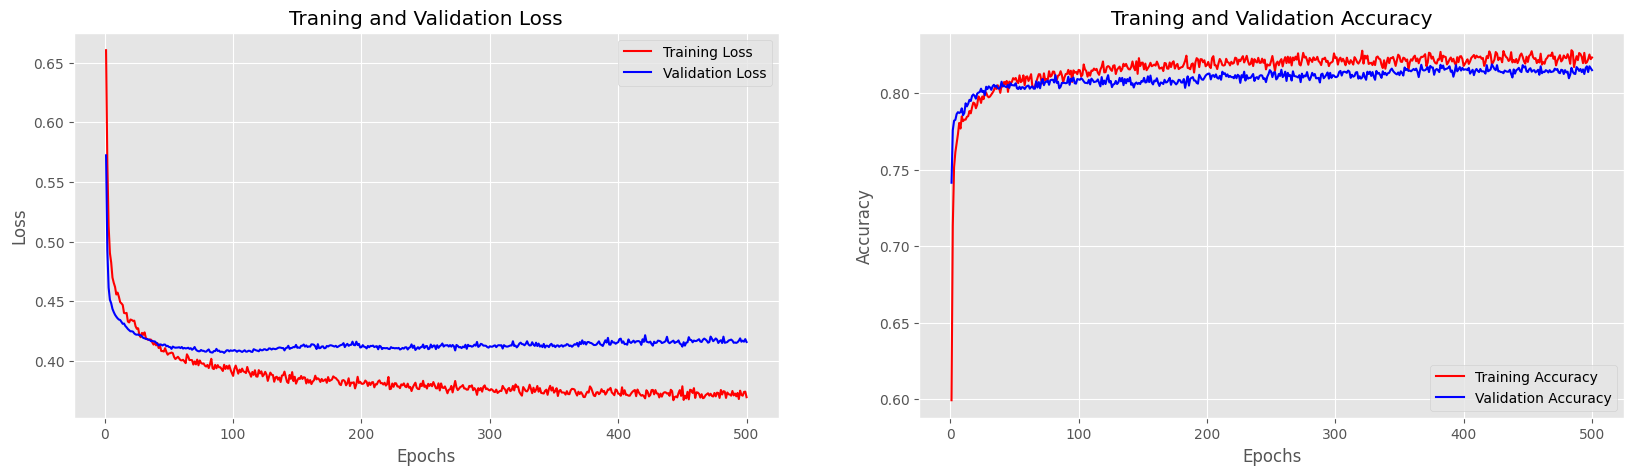

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)
plt.subplot(1,2,1)
plt.plot(epochs,loss_values,'r',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.title('Traning and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Traning and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Submission

In [89]:
result=model.predict(np.array(pred,dtype='float32'))

134/134 [==============================] - 0s 3ms/step


In [90]:
sample_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [91]:
result

array([[4.8999783e-01],
       [3.0695894e-04],
       [1.0000000e+00],
       ...,
       [9.9083400e-01],
       [6.4554590e-01],
       [6.2774116e-01]], dtype=float32)

In [92]:
sample_df['Transported']=result
sample_df.head()

,PassengerId,Transported
0,0013_01,0.489998
1,0018_01,0.000307
2,0019_01,1.000000
3,0021_01,1.000000
4,0023_01,0.674965


In [93]:
sample_df.Transported=round(sample_df.Transported).astype(bool)
sample_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [94]:
sample_df.to_csv('solution.csv', index=False)